<a href="https://colab.research.google.com/github/Agneya-1BM22CS024/ML_Lab/blob/main/1BM22CS024_Lab_8_RF_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

# Load the dataset
df = pd.read_csv('train.csv')


# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Convert non-numerical columns to numerical using Label Encoding
for column in X.columns:
    if X[column].dtype == 'object':
      le = preprocessing.LabelEncoder()
      X[column] = le.fit_transform(X[column])


# Handle potential errors during data conversion
if y.dtype == 'object':
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8659217877094972
Confusion Matrix:
[[ 26   0  17]
 [  0  12   5]
 [  2   0 117]]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

# Load the dataset
df = pd.read_csv('iris.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert non-numerical columns to numerical using Label Encoding
for column in X.columns:
    if X[column].dtype == 'object':
      le = preprocessing.LabelEncoder()
      X[column] = le.fit_transform(X[column])

# Handle potential errors during data conversion
if y.dtype == 'object':
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier with default n_estimators
rf_classifier_default = RandomForestClassifier(random_state=42)
rf_classifier_default.fit(X_train, y_train)

# Make predictions and evaluate with default n_estimators
y_pred_default = rf_classifier_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators: {accuracy_default}")

# Fine-tune the model by changing n_estimators
best_accuracy = 0
best_n_estimators = 0
for n_estimators in range(1, 101):  # Test n_estimators from 1 to 100
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy: {best_accuracy} with n_estimators = {best_n_estimators}")

Accuracy with default n_estimators: 1.0
Best accuracy: 1.0 with n_estimators = 100


AUC with n_estimators=10: 1.0
AUC with n_estimators=20: 1.0
AUC with n_estimators=30: 1.0


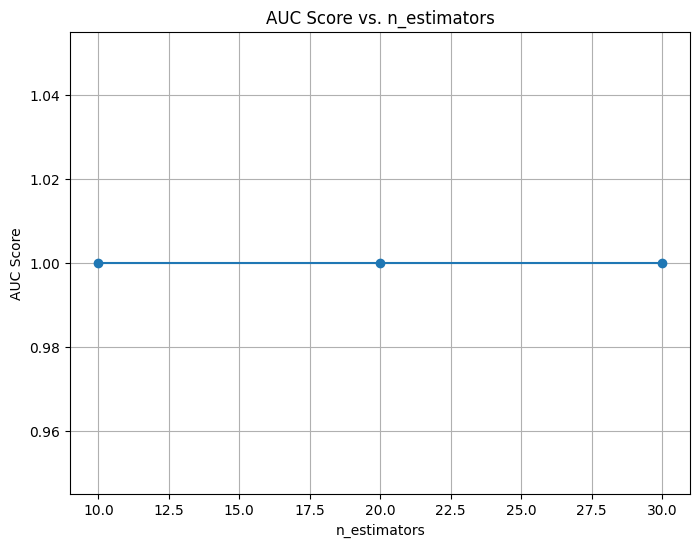

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

auc_scores = []
n_estimators_values = [10, 20, 30]

for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_prob = rf_classifier.predict_proba(X_test)  # Probability of positive class
    auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')
    auc_scores.append(auc)
    print(f"AUC with n_estimators={n_estimators}: {auc}")

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, auc_scores, marker='o')
plt.xlabel("n_estimators")
plt.ylabel("AUC Score")
plt.title("AUC Score vs. n_estimators")
plt.grid(True)
plt.show()